# TechnoHacks Edutech Task 1

# Task : Wine Quality Prediction

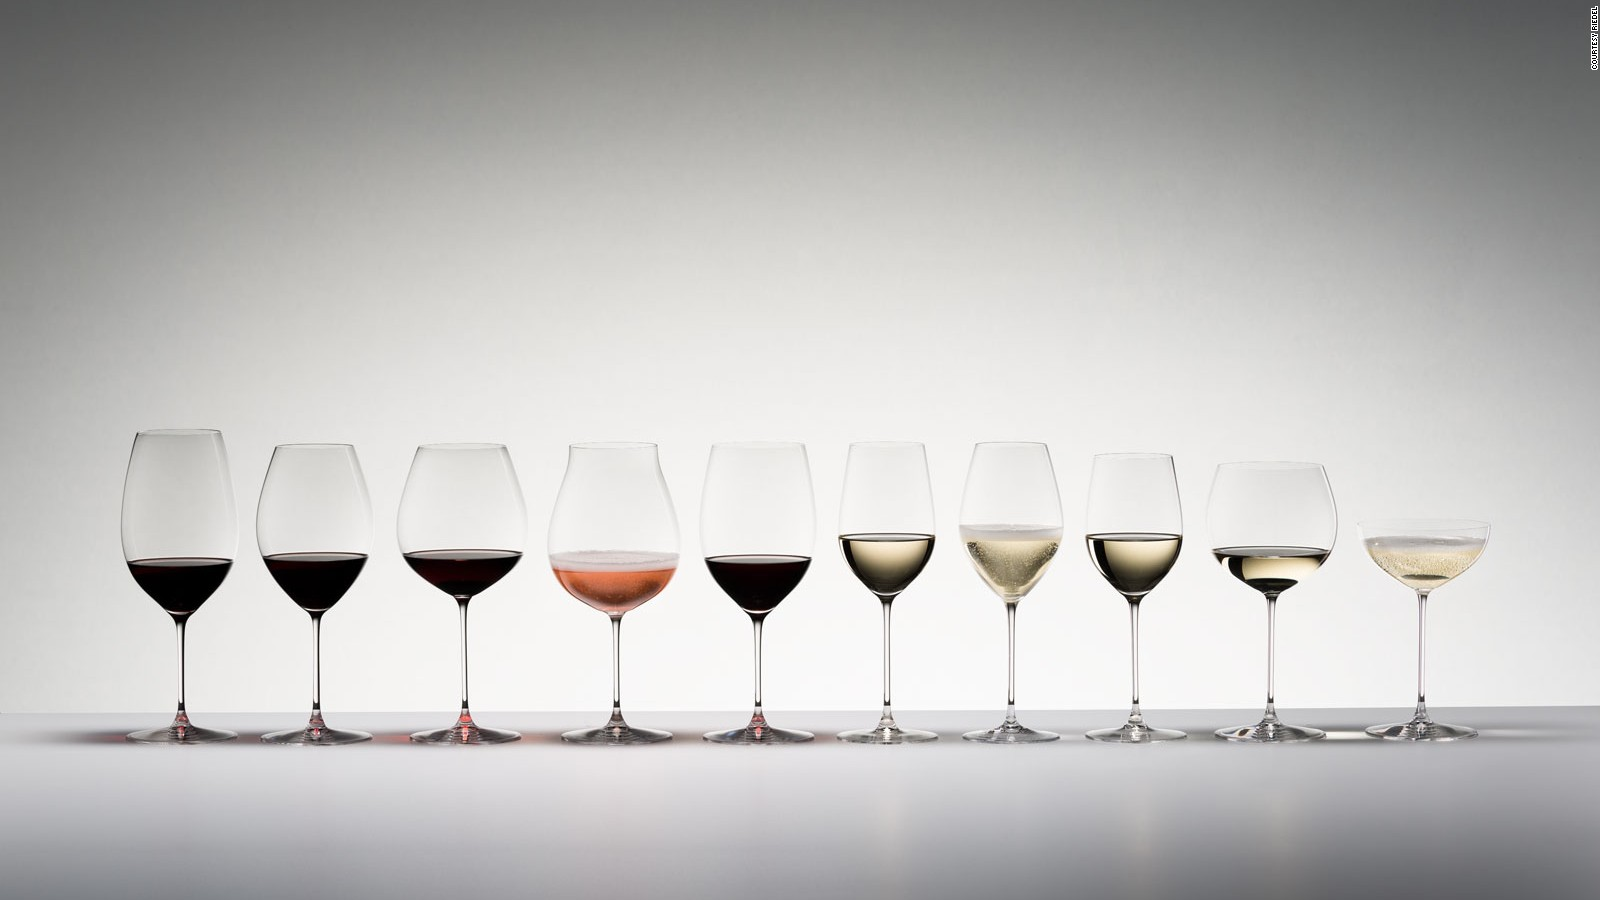

# About the Dataset

The dataset used here is the Red wine quality dataset. This dataset is taken from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

The dataset contains 1599 rows and 12 columns. The columns are as follows:

Input variables (based on physicochemical tests):

1.  Fixed Acidity - Refers to the concentration of non-volatile acids in a wine. It contributes to the overall tartness or sourness of the wine and is an important factor in determining its taste profile.
2.  Volatile Acidity - Represents the presence of volatile acids, primarily acetic acid, in a wine. Higher levels of volatile acidity can give a vinegar-like off-flavor and are generally considered undesirable.
3.  Citric Acid - A natural acid found in citrus fruits, citric acid can be present in wines as well. It adds freshness and a citrusy flavor, often contributing to the overall balance and complexity of the wine.
4.  Residual Sugar - Refers to the amount of sugar remaining in the wine after fermentation. It contributes to the sweetness of the wine and can range from dry (very little residual sugar) to sweet (higher residual sugar levels).
5.  Chlorides - Represents the concentration of salt in the wine. High levels of chlorides can contribute to a salty taste, which is generally undesirable in wine.
6.  Free Sulfur Dioxide - Sulfur dioxide is commonly used as a preservative in winemaking. Free sulfur dioxide refers to the amount of sulfur dioxide that is not bound to other compounds. It helps prevent oxidation and microbial spoilage in wine.
7.  Total Sulfur Dioxide - Represents the total amount of both free and bound sulfur dioxide in the wine. It is an important parameter for assessing the wine's stability and preservation.
8.  Density -  Refers to the mass of the wine per unit volume. It is influenced by factors such as sugar content, alcohol content, and overall composition, and can provide insights into the wine's body and richness.
9.  PH - Represents the level of acidity or alkalinity in a wine on a logarithmic scale. Lower pH values indicate higher acidity, while higher pH values indicate lower acidity. pH plays a crucial role in determining the overall balance and stability of the wine.
10.  Sulphates - Refers to the concentration of sulfur-containing compounds, such as sulfites, in the wine. Sulphates can act as antioxidants and preservatives, helping to maintain the wine's freshness and prevent spoilage.
11.  Alcohol - Represents the percentage of alcohol by volume in the wine. It contributes to the wine's body, texture, and overall perception of warmth or heat.

Output variable (based on sensory data):

12.  Quality (score between 0 and 10) - A score between 0 and 10 based on sensory evaluation data. It represents the overall subjective assessment of the wine's quality, taking into account various factors such as aroma, taste, balance, complexity, and overall enjoyment.

# About the Task
In this task, we have to predict the quality of red wine based on the physicochemical tests.

## Tips for the task

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows us to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

# Importing Libraries

In [112]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the dataset

In [113]:
# Loading the dataset
wine_df = pd.read_csv('winequality-red.csv')
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [114]:
# Showing first 5 rows
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [115]:
# Showing last 5 rows
wine_df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

# Basic Understanding of the dataset

In [116]:
# showing the dimensions of the dataset
wine_df.shape

(1599, 12)

### This dataset contains 1599 rows and 12 columns.

In [117]:
# showing columns of the dataset
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [118]:
# checking for data types
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [119]:
# showing information about the dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Insights:

From the above information, we can see that :
1. The dataset has 1599 rows and 12 columns.
2. All the columns are of the correct data type.
3. All the columns have no null values.
4. All the columns are Numeric.

# Data Cleaning and Data Preprocessing

## Plotting boxplot and Checking for Outliers

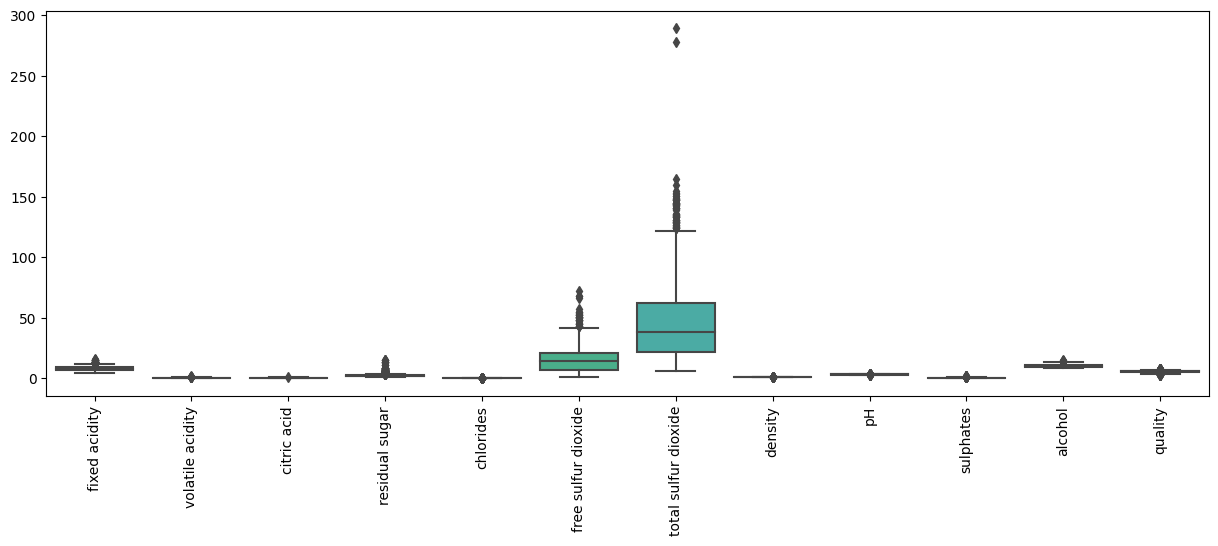

In [120]:
plt.figure(figsize=(15,5))
sns.boxplot(wine_df)
plt.xticks(rotation=90)
plt.show()

Insights:

We can see that free sulphur dioxide and total sulphur dioxide column has  so we will remove outliers from this column.

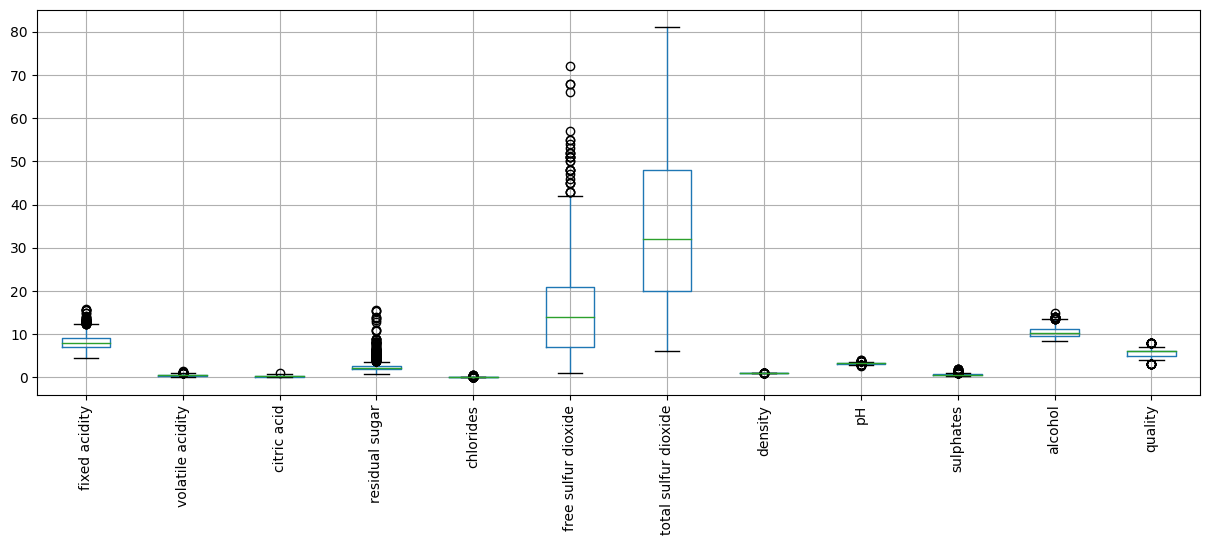

In [121]:
# Removing Outliers
column = wine_df[['free sulfur dioxide','total sulfur dioxide']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
wine_df[['free sulfur dioxide','total sulfur dioxide']] = column[(column > lower_bound) & (column < upper_bound)]

# Plotting boxplot after removing outliers
wine_df.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

## Handling Duplicated Values

In [122]:
# checking for duplicated values
wine_df.duplicated().sum()

241

In [123]:
# Dropping duplicated values
wine_df.drop_duplicates(inplace=True)

# checking for dimension after dropping duplicated values
wine_df.shape

(1358, 12)

### After dropping the duplicated values, the dataset has 1358 rows and 12 columns.

## Null Values Treatment

In [124]:
# Checking for null values
wine_df.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide    210
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

Insights:


We have missing values in total sulfur dioxide column which is 210 . So we fill the missing values with its mean values.

In [125]:
# Filling missing values with its mean values
wine_df['total sulfur dioxide'] = wine_df['total sulfur dioxide'].fillna(wine_df['total sulfur dioxide'].mean())

# checking for null values
wine_df['total sulfur dioxide'].isnull().any()

False

# Descriptive Statistical Analyssis

In [126]:
wine_df.describe().T

count       mean        std      min      25%  \
fixed acidity         1358.0   8.310898   1.737594  4.60000   7.1000   
volatile acidity      1358.0   0.529647   0.182993  0.12000   0.3900   
citric acid           1358.0   0.272032   0.195295  0.00000   0.0900   
residual sugar        1358.0   2.519146   1.343686  0.90000   1.9000   
chlorides             1358.0   0.088152   0.049384  0.01200   0.0700   
free sulfur dioxide   1358.0  15.877393  10.434635  1.00000   7.0000   
total sulfur dioxide  1358.0  35.424652  17.313917  6.00000  22.0000   
density               1358.0   0.996712   0.001867  0.99007   0.9956   
pH                    1358.0   3.310007   0.154880  2.74000   3.2100   
sulphates             1358.0   0.658814   0.170682  0.33000   0.5500   
alcohol               1358.0  10.430940   1.081275  8.40000   9.5000   
quality               1358.0   5.622239   0.823033  3.00000   5.0000   

                            50%       75%       max  
fixed acidity          7.900000   9.20000  15.90000  
volatile acidity       0.520000   0.64000   1.58000  
citric acid            0.260000   0.43000   1.00000  
residual sugar         2.200000   2.60000  15.50000  
chlorides              0.079000   0.09100   0.61100  
free sulfur dioxide   14.000000  21.00000  72.00000  
total sulfur dioxide  35.424652  46.00000  81.00000  
density                0.996700   0.99782   1.00369  
pH                     3.310000   3.40000   4.01000  
sulphates              0.620000   0.73000   2.00000  
alcohol               10.200000  11.10000  14.90000  
quality                6.000000   6.00000   8.00000

Insights:

The first thing that catches my eye is that there is no negative value in the table, as there could not be a negative ratio in a product. From this, it can be said that the dataset is consistent. Only the minimum value of citric acid appears as 0, which is intriguing. Citric acid is a naturally occurring acid in winemaking, so the lowest value being 0 does not seem very likely. Also, small amounts of citric acid can add freshness and flavor to wines. To make sure that the zero values in the dataset are completely real, that is, they are not noisy data, it may be necessary to consult a person with domain knowledge and do a more detailed analysis.

When we look at the residual sugar amount, we see that there is a serious difference between the min and max values. This variable, which represents the sugar left in the wine after fermentation, affects whether the wine is dry or not. Generally, the wines on the market are dry. Dry wine is a wine that contains less than 4 grams of sugar per liter on average. Therefore, looking at the residual sugar variable, we can say by looking at this table that it may contain outliers and its distribution may be right-skewed. But the amount of residual sugar does not have an effect that can qualify the wine as good or bad.

Another variable, sulfur dioxide, also seems to have a significant difference between the min and max values, but this is actually a possible situation for the amount of sulfur dioxide. This substance is added to wine as a preservative, antioxidant and antimicrobial. It affects the taste, aroma, color and shelf life of the wine. There is no exact measure for it, it can be put into the wine as an active substance up to the max upper limit allowed by producer preference. This limit is 300 mg/l for red wine. Looking at the table, we see that the limit is not exceeded.

# Data Visualization

# Plotting Histplot for the features

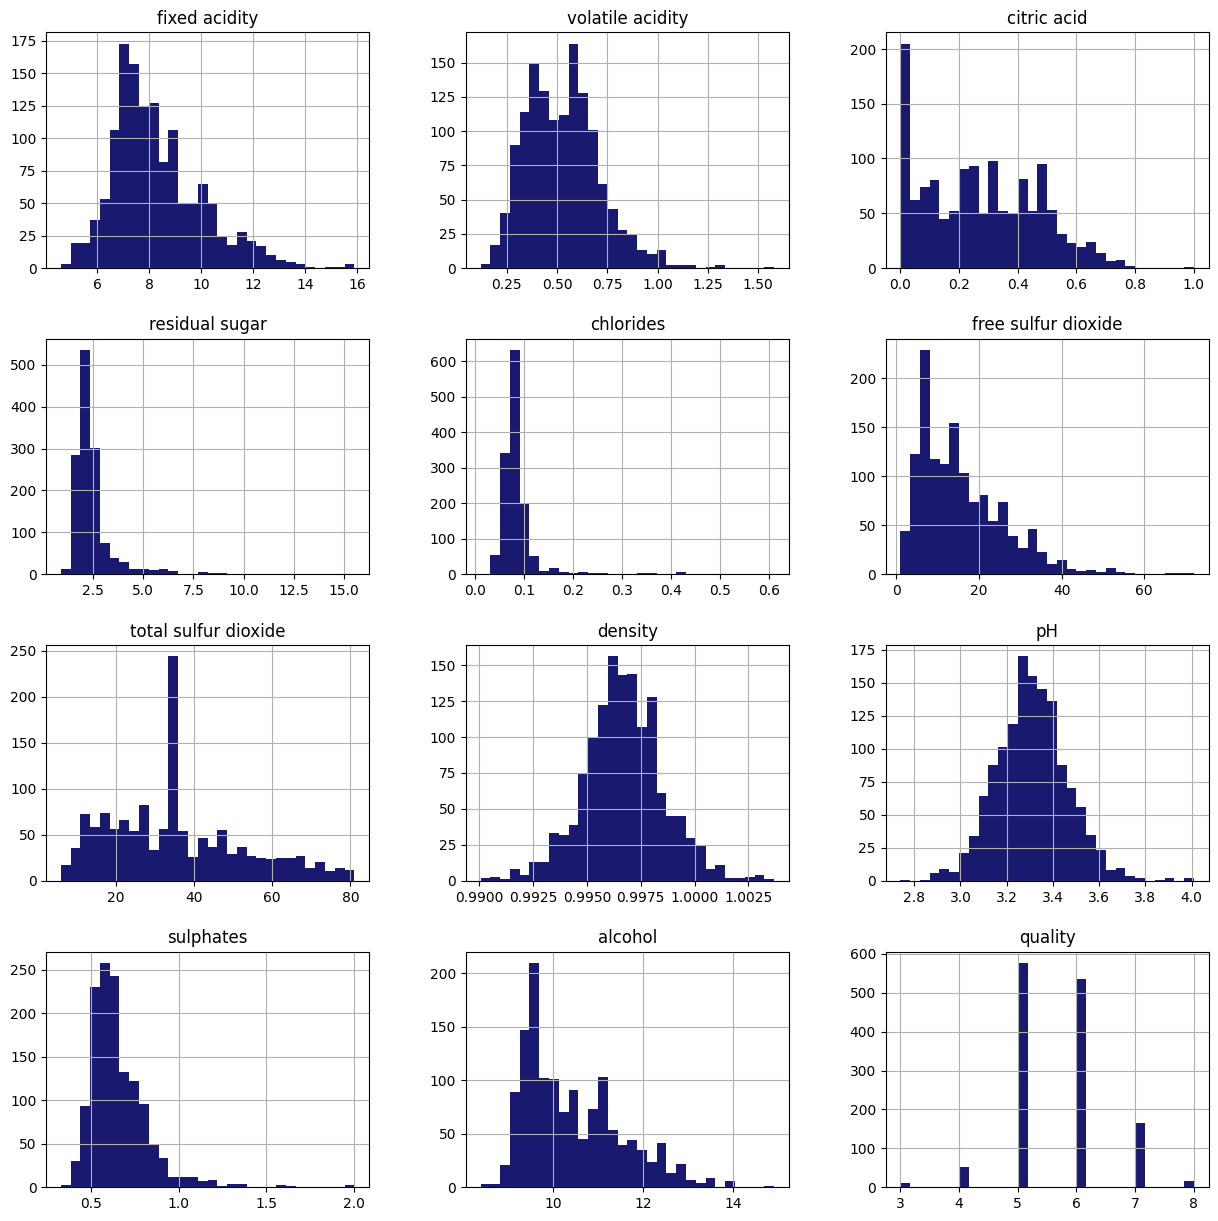

In [127]:
# Plotting histplot for the features
wine_df.hist(figsize=(15,15),bins=30,color='#191970')
plt.show()

Insights:

1. The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
2. The attributes 'density' and 'pH' are quite normally distributed.
3. Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.


# Distribution plot

# Plotting distribution of density of all the features quality wise

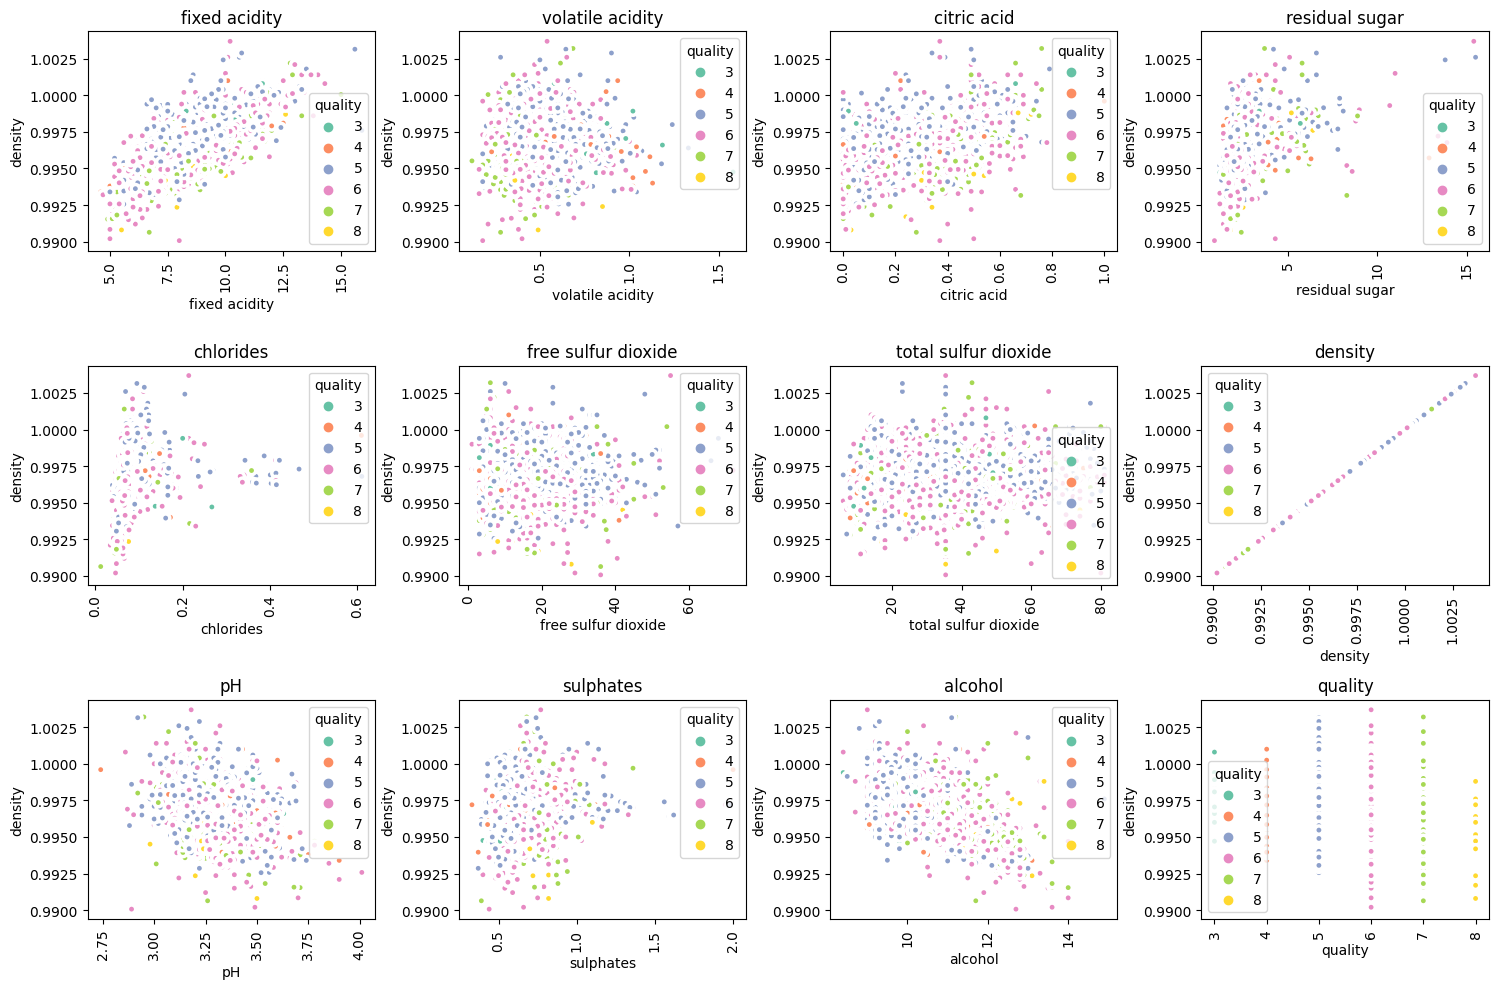

In [128]:
fig = plt.figure(figsize=(15,10))
for index,column in enumerate(list(wine_df.columns[0:12])):
    plt.subplot(3,4,index+1)
    sns.scatterplot(x = wine_df.loc[:, column], y = wine_df["density"], hue= wine_df['quality'],linewidth=2.5,palette="Set2")
    plt.xticks(rotation=90)
    plt.title(column, size = 12)
fig.tight_layout()

# Scatter Plot for finding pH of ctric acid

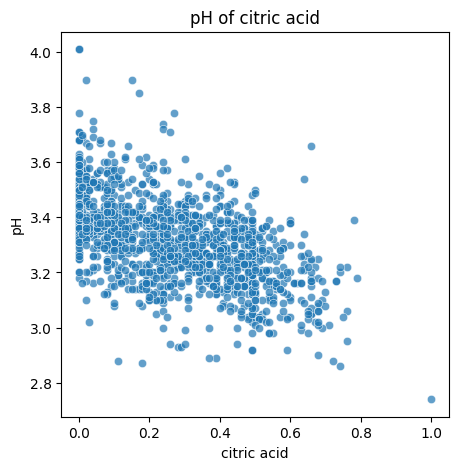

In [129]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = "citric acid", y = "pH",data = wine_df, alpha = 0.7,palette='terrain')
plt.title("pH of citric acid", size = 12)
plt.show()

Insights:

Generally , the pH of citric acid lies between 3.2 and 3.4

# Quality Column

## Countplot for quality column

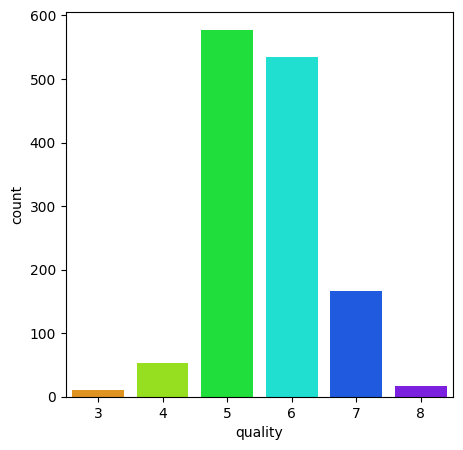

In [130]:
# plotting countplot for quality
plt.figure(figsize=(5,5))
sns.countplot(x=wine_df['quality'],palette='gist_rainbow')
plt.show()

Insights:

The most preferred wine quality is 5 and 6.

## Density plot for distribution of quality

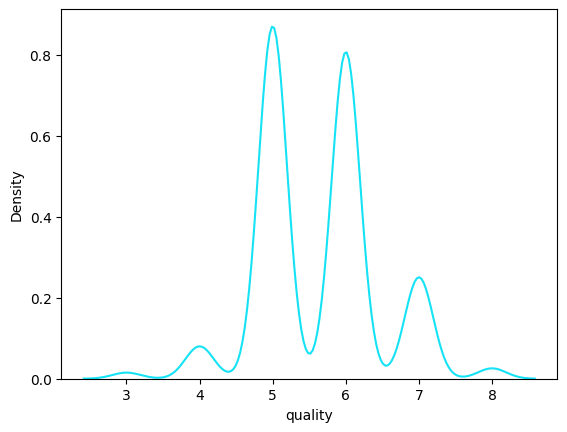

In [131]:
# plotting distribution of quality
sns.kdeplot(x=wine_df['quality'],color='#16E2F5')
plt.show()

Insights:

The highest variation in density is in when quality is 5 and 6

## Plotting boxplot for quality v/s all the features.

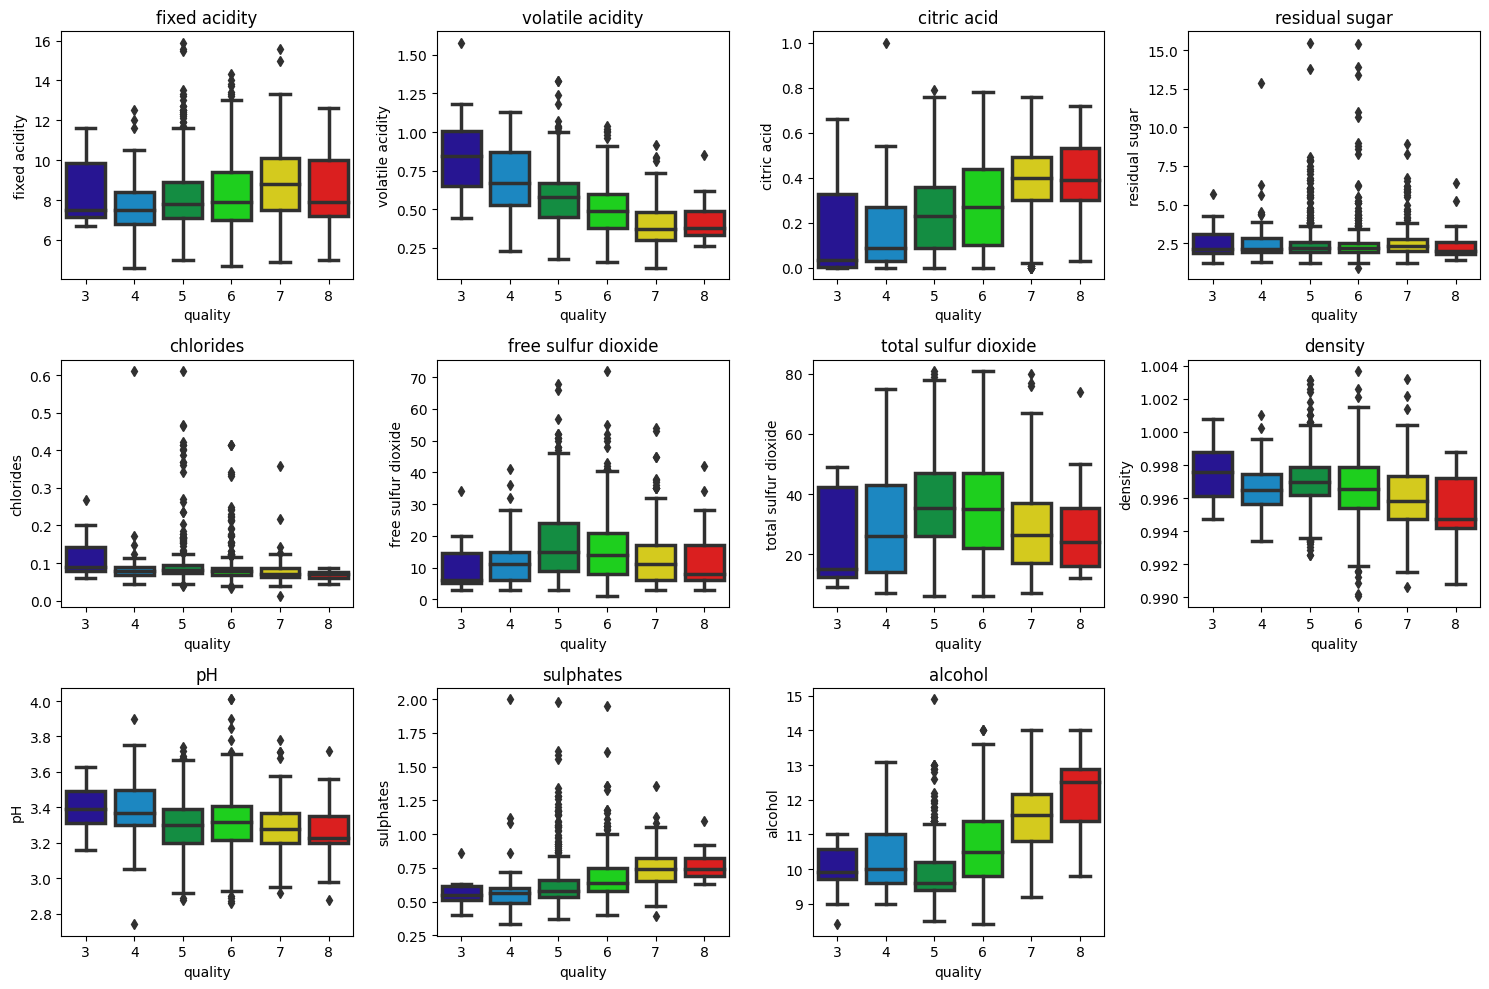

In [132]:
fig = plt.figure(figsize=(15,10))
for index,column in enumerate(list(wine_df.columns[0:11])):
    plt.subplot(3,4,index+1)
    sns.boxplot(y = wine_df.loc[:, column], x = wine_df["quality"], linewidth=2.5,palette='nipy_spectral')
    plt.title(column, size = 12)
fig.tight_layout()

## Plotting violinplot for quality v/s all the features.

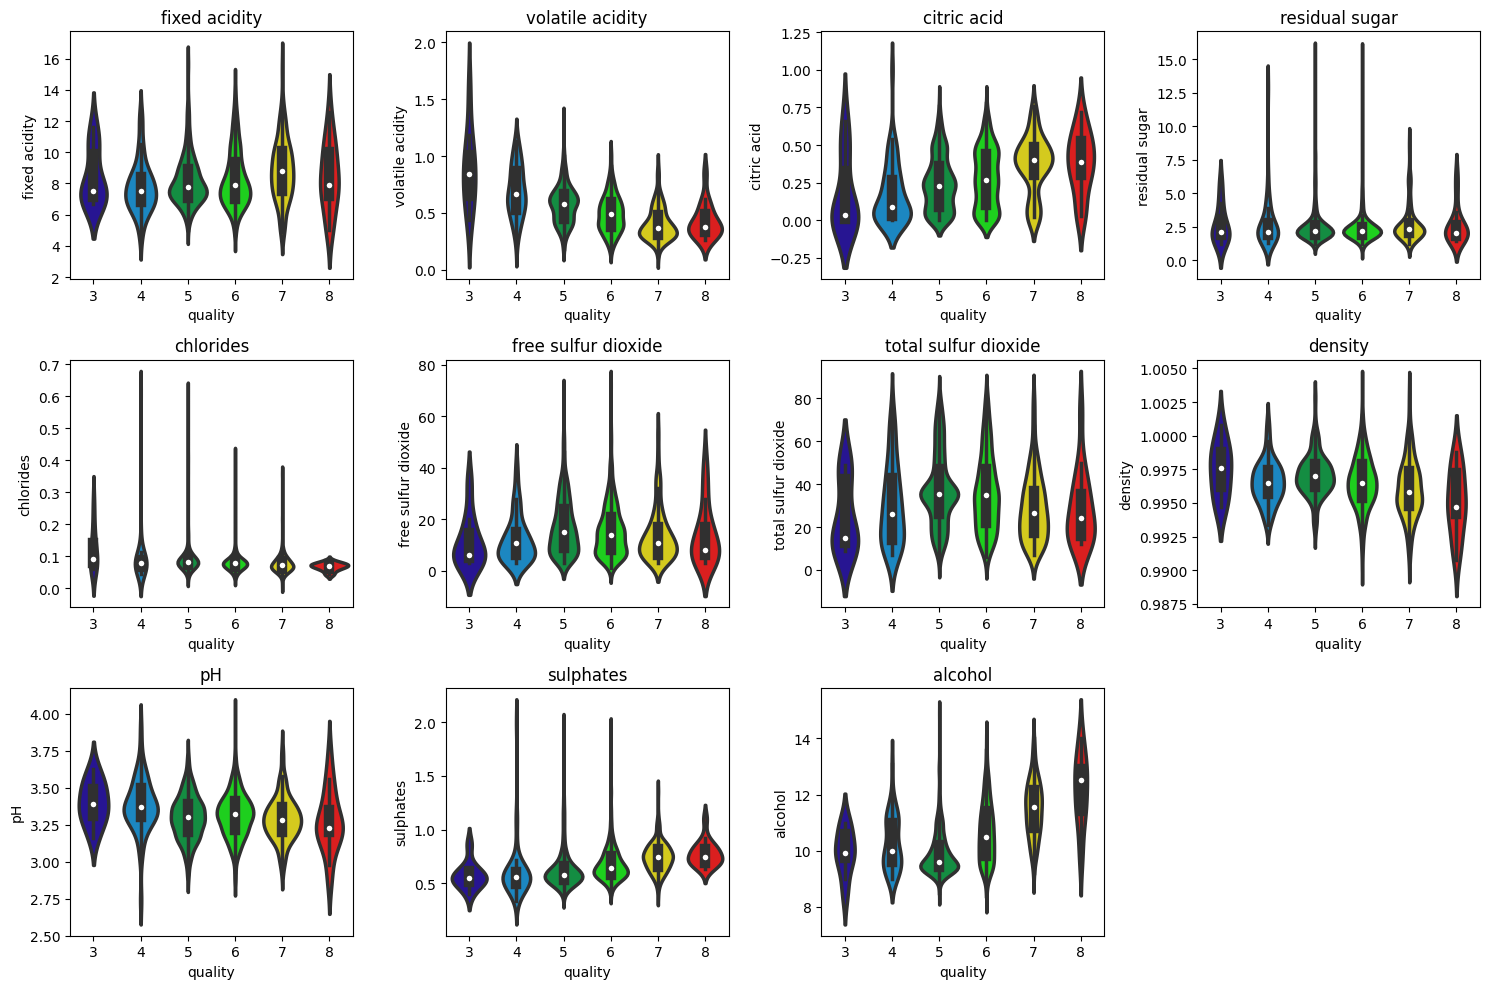

In [133]:
fig = plt.figure(figsize=(15,10))
for index,column in enumerate(list(wine_df.columns[0:11])):
    plt.subplot(3,4,index+1)
    sns.violinplot(y = wine_df.loc[:, column], x = wine_df["quality"], linewidth=2.5,palette='nipy_spectral')
    plt.title(column, size = 12)
fig.tight_layout()

# Correlation Plot

In [134]:
# showing correlation matrix
wine_df.corr().T

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255496     0.668886   
volatile acidity          -0.255496          1.000000    -0.550523   
citric acid                0.668886         -0.550523     1.000000   
residual sugar             0.112531          0.001509     0.138484   
chlorides                  0.085772          0.054484     0.211767   
free sulfur dioxide       -0.140444         -0.019075    -0.051345   
total sulfur dioxide      -0.062955          0.002283     0.009866   
density                    0.670770          0.022231     0.361940   
pH                        -0.687985          0.245806    -0.548974   
sulphates                  0.190175         -0.257974     0.328018   
alcohol                   -0.061364         -0.196547     0.102734   
quality                    0.119440         -0.394304     0.226084   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.112531   0.085772            -0.140444   
volatile acidity            0.001509   0.054484            -0.019075   
citric acid                 0.138484   0.211767            -0.051345   
residual sugar              1.000000   0.029291             0.155308   
chlorides                   0.029291   1.000000             0.001929   
free sulfur dioxide         0.155308   0.001929             1.000000   
total sulfur dioxide        0.020597   0.088698             0.583365   
density                     0.333188   0.192810            -0.015221   
pH                         -0.077687  -0.272429             0.059755   
sulphates                  -0.009158   0.394258             0.055557   
alcohol                     0.058305  -0.223136            -0.082977   
quality                     0.008444  -0.130200            -0.053149   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.062955  0.670770 -0.687985   0.190175   
volatile acidity                  0.002283  0.022231  0.245806  -0.257974   
citric acid                       0.009866  0.361940 -0.548974   0.328018   
residual sugar                    0.020597  0.333188 -0.077687  -0.009158   
chlorides                         0.088698  0.192810 -0.272429   0.394258   
free sulfur dioxide               0.583365 -0.015221  0.059755   0.055557   
total sulfur dioxide              1.000000  0.093888  0.025971   0.085049   
density                           0.093888  1.000000 -0.359296   0.145050   
pH                                0.025971 -0.359296  1.000000  -0.215733   
sulphates                         0.085049  0.145050 -0.215733   1.000000   
alcohol                          -0.158626 -0.503802  0.216413   0.092857   
quality                          -0.090060 -0.182342 -0.052991   0.250236   

                       alcohol   quality  
fixed acidity        -0.061364  0.119440  
volatile acidity     -0.196547 -0.394304  
citric acid           0.102734  0.226084  
residual sugar        0.058305  0.008444  
chlorides            -0.223136 -0.130200  
free sulfur dioxide  -0.082977 -0.053149  
total sulfur dioxide -0.158626 -0.090060  
density              -0.503802 -0.182342  
pH                    0.216413 -0.052991  
sulphates             0.092857  0.250236  
alcohol               1.000000  0.479236  
quality               0.479236  1.000000

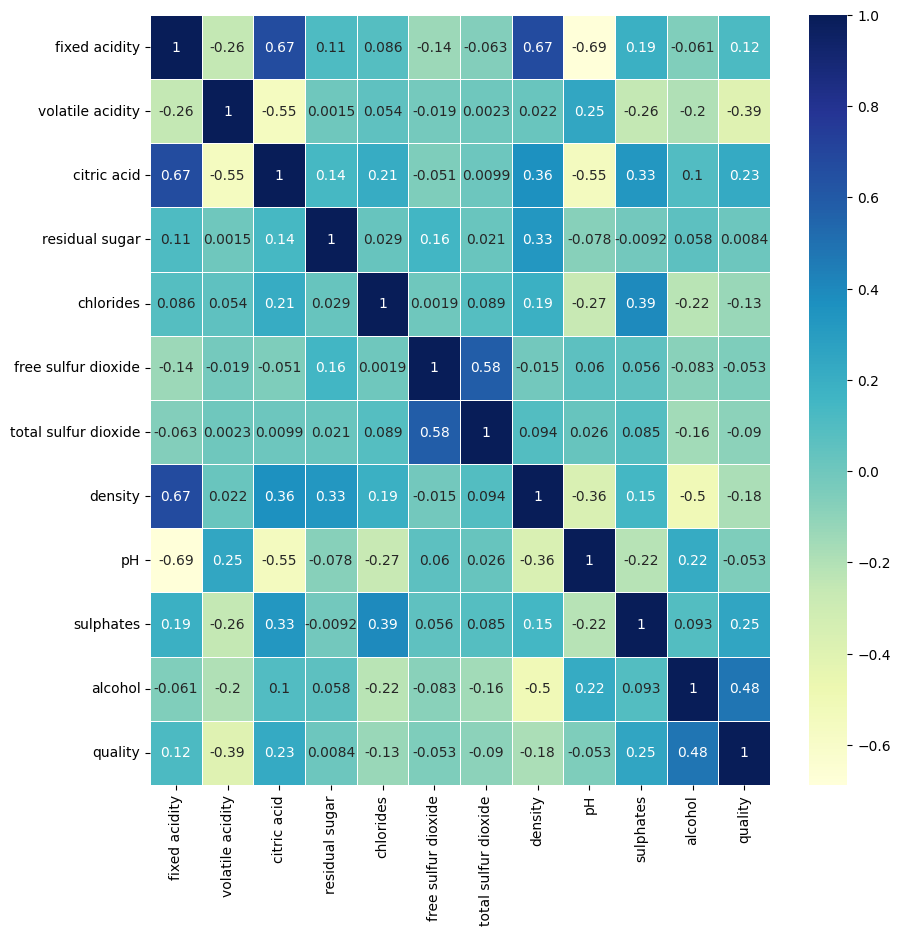

In [135]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine_df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

Insights:

1. Alcohol has the highest positive correlation with wine quality.
2. There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
3. There is a relatively high negative correlation between fixed_acidity and pH.
4. Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
5. citric acid & volatile acidity have negative correlation.
6. free sulphur dioxide & total sulphur dioxide have positive correlation.

# Pairwise Relationship

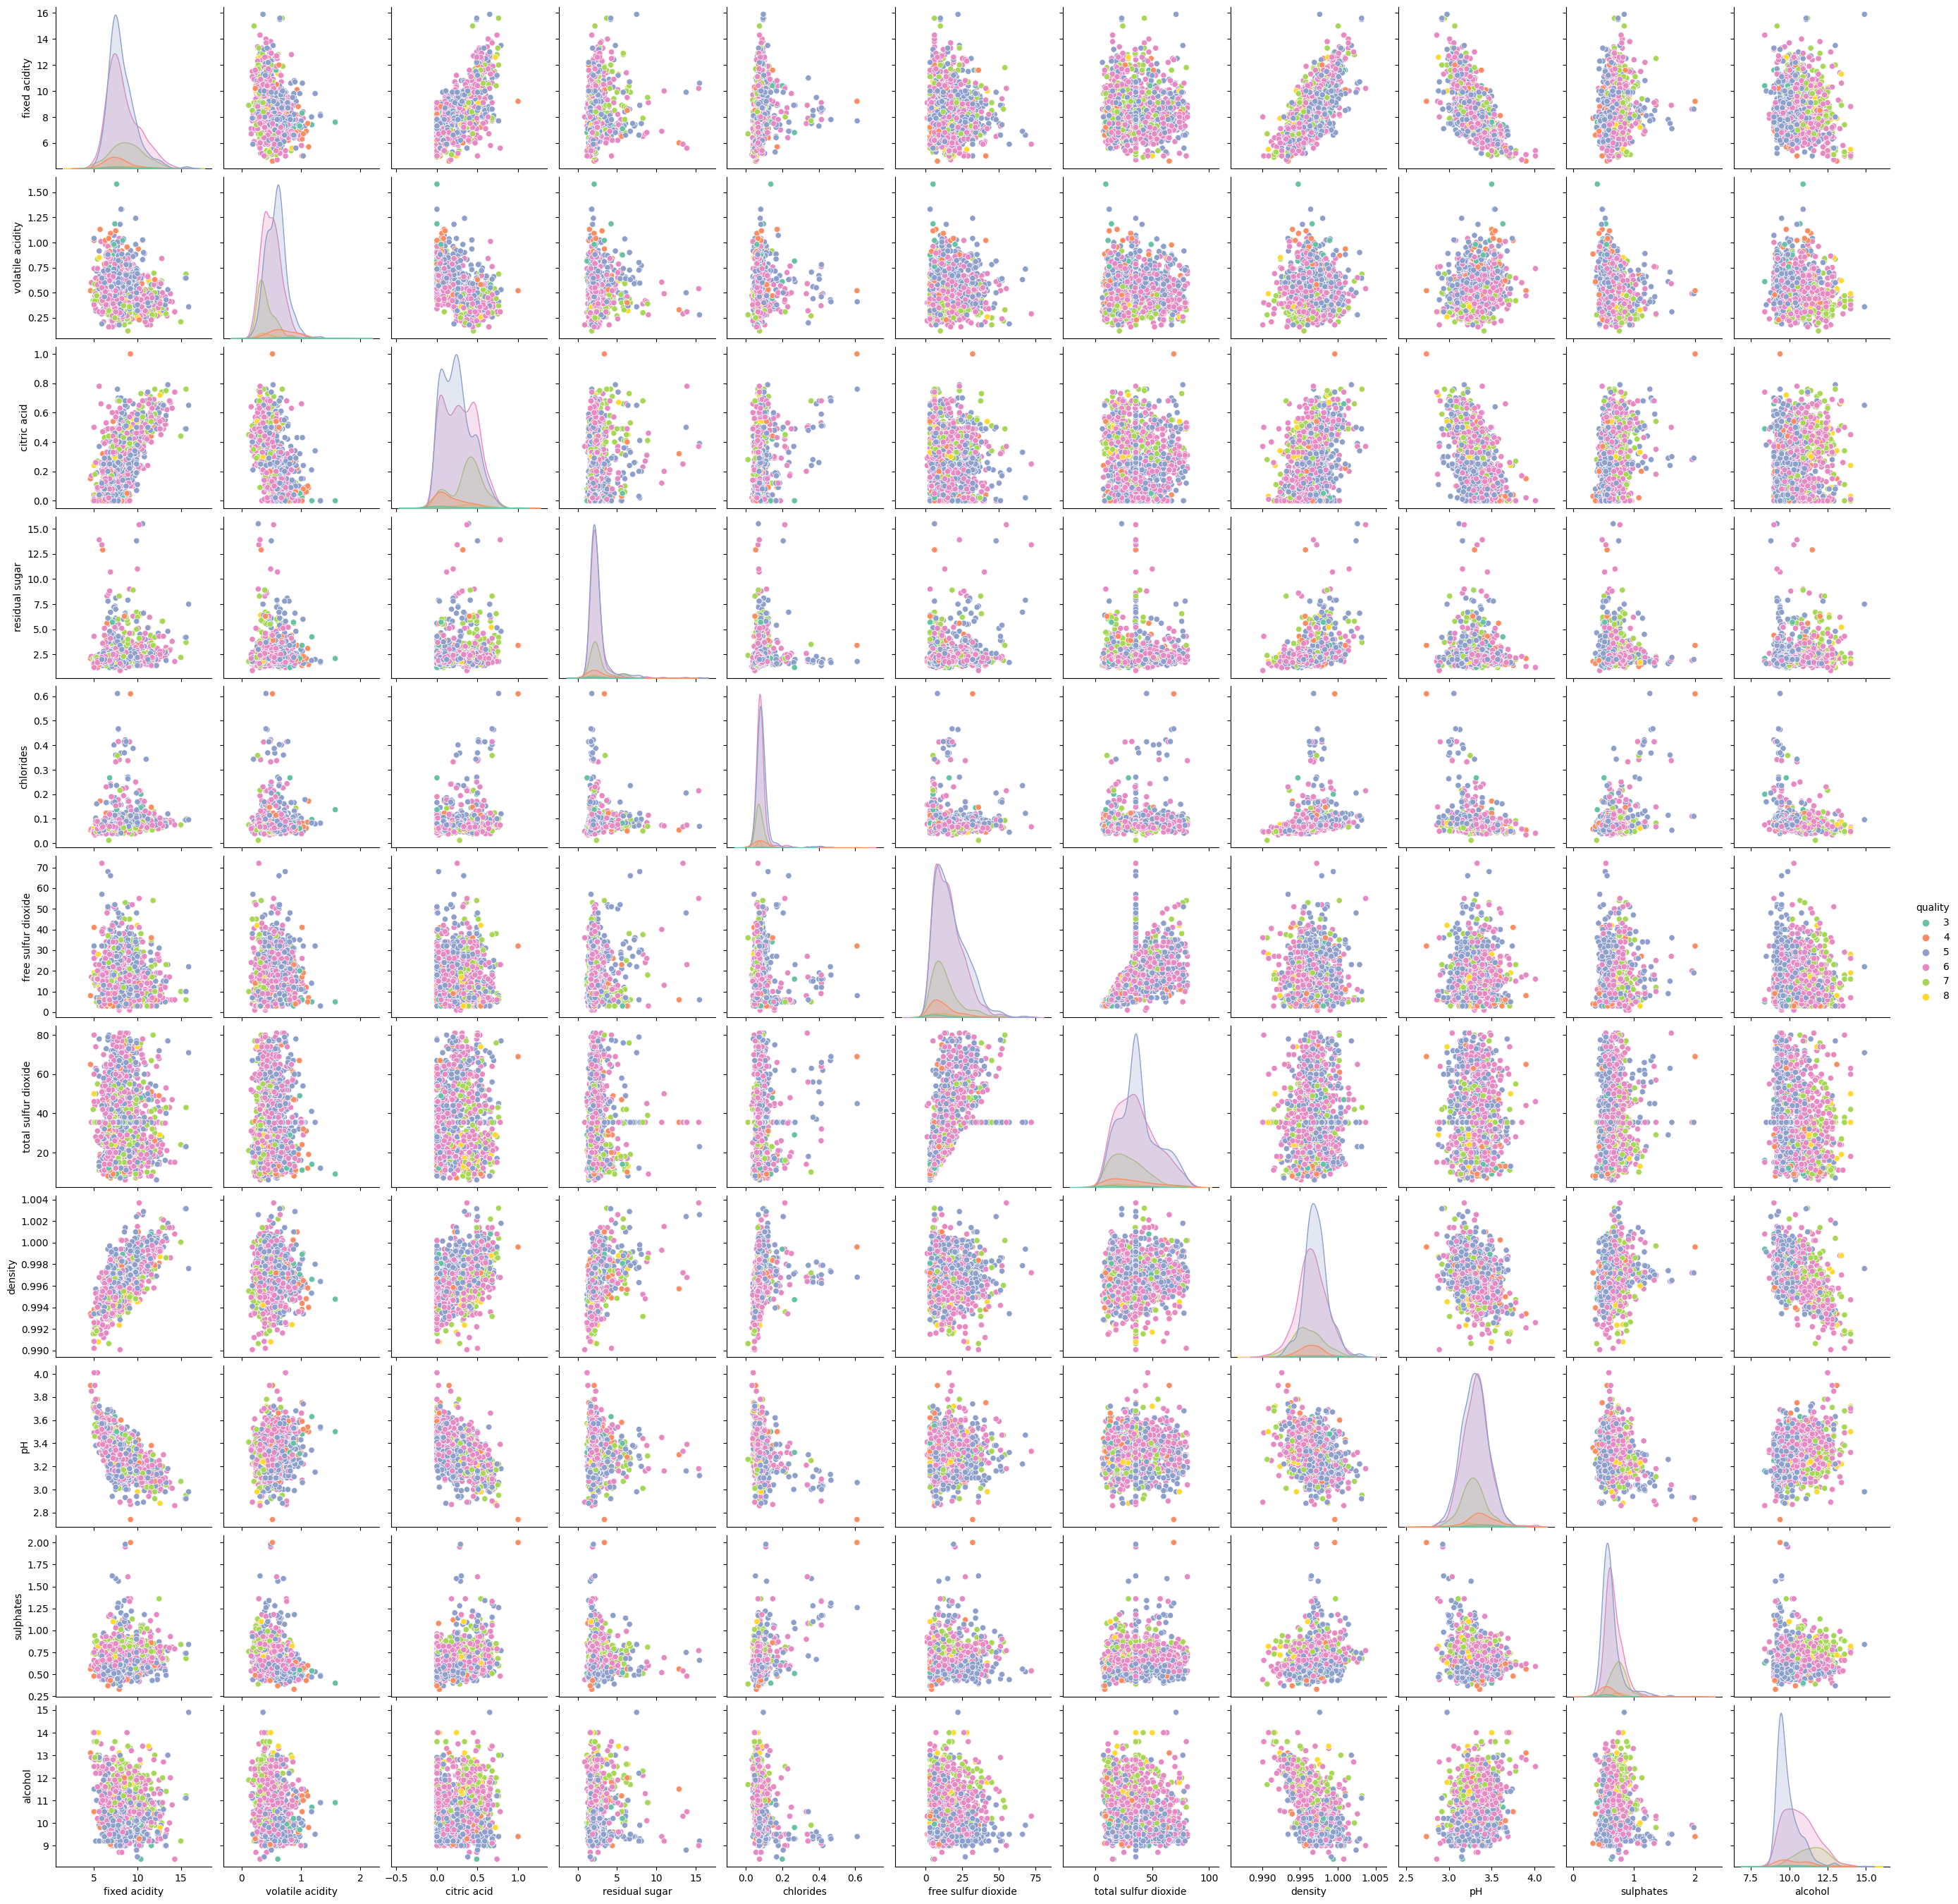

In [136]:
sns.pairplot(wine_df,hue = 'quality', palette = "Set2")
plt.show()

# Target Variable

## Quality Column

## Changing Data of Quality Column

As we have already mentioned above that we have to try classification models instead of regression models. For Classification, we need a dependent variable which is Quality. So we need to classify Quality into category such as..
1. The quality is equal and  above 7 is classified as 'good/1'.
2. The quality below 7 is classified as 'bad/0'.

In [137]:
# Creating Classification version of target variable
wine_df['quality'] = [1 if x >= 7 else 0 for x in wine_df['quality']]# Separate feature variables and target variable
wine_df['quality'].value_counts()

0    1175
1     183
Name: quality, dtype: int64

## Plotting countplot for quality

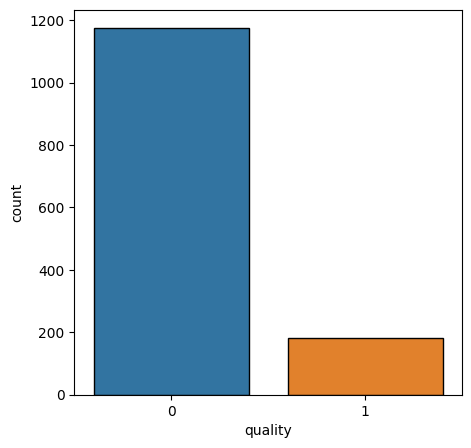

In [138]:
plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=wine_df,edgecolor='black')
plt.xlabel('quality')
plt.show()

Insights:

From the above plot we can see that the most of the wine are of bad quality.

## Plotting percentage distribution of quality

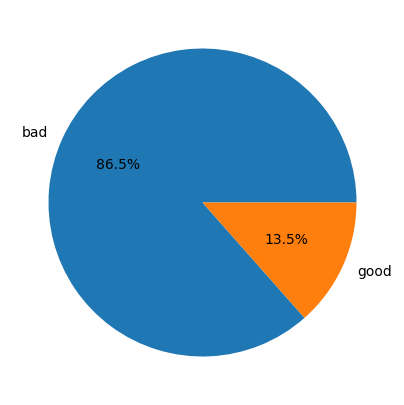

In [139]:
plt.figure(figsize=(5,5))
plt.pie(wine_df['quality'].value_counts(),labels=['bad','good'],autopct='%1.1f%%')
plt.show()

Insights:

The quality of wine is mostly bad which is about 86.5 % of the total wine.

# Selecting the Dependent and Independent Features

In [140]:
x = wine_df.drop('quality',axis=1)  # dataframe
y = wine_df['quality']        # series
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1358, 11) (1358,)


In [141]:
print(y)

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1358, dtype: int64


# Train Test Split

### Dividing the data into training and testing data

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
print(1358*0.25)

339.5


In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1018, 11)
(340, 11)
(1018,)
(340,)


# Normailzation of data

In [145]:
# Normalising the data before training help us to achieve stable and fast training of the model.

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [146]:
print(x_train)

[[0.25663717 0.25352113 0.53164557 ... 0.62608696 0.16969697 0.32307692]
 [0.15044248 0.6056338  0.         ... 0.63478261 0.13333333 0.43076923]
 [0.61061947 0.1056338  0.64556962 ... 0.14782609 0.36363636 0.21538462]
 ...
 [0.22123894 0.26056338 0.08860759 ... 0.37391304 0.2        0.36923077]
 [0.38053097 0.11267606 0.39240506 ... 0.26956522 0.13333333 0.30769231]
 [0.39823009 0.14084507 0.49367089 ... 0.27826087 0.2969697  0.4       ]]


In [147]:
print(x_test)

[[0.27433628 0.32394366 0.05063291 ... 0.4173913  0.12121212 0.16923077]
 [0.31858407 0.33450704 0.12658228 ... 0.37391304 0.25454545 0.38461538]
 [0.33628319 0.14788732 0.5443038  ... 0.26956522 0.29090909 0.43076923]
 ...
 [0.15929204 0.18309859 0.11392405 ... 0.47826087 0.21212121 0.30769231]
 [0.30088496 0.1056338  0.56962025 ... 0.25217391 0.29090909 0.63076923]
 [0.61061947 0.13380282 0.62025316 ... 0.4        0.35151515 0.4       ]]


# Creating Functions to generate confusion matrix, classification report, accuracy score, ROC_AUC Score.

In [148]:
# Importing Libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [149]:
def eval_model(model, model_name, x_test, y_test, y_pred):
    print(f"--- {model_name} Evaluation ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

def plot_roc_auc(model, y_test):
    y_probs = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1],'k--')  # Diagonal line (random guessing)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


# 1. Logistic Regression

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
--- Logistic Regression Evaluation ---
Confusion Matrix:
[[291   2]
 [ 39   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       293
           1       0.80      0.17      0.28        47

    accuracy                           0.8

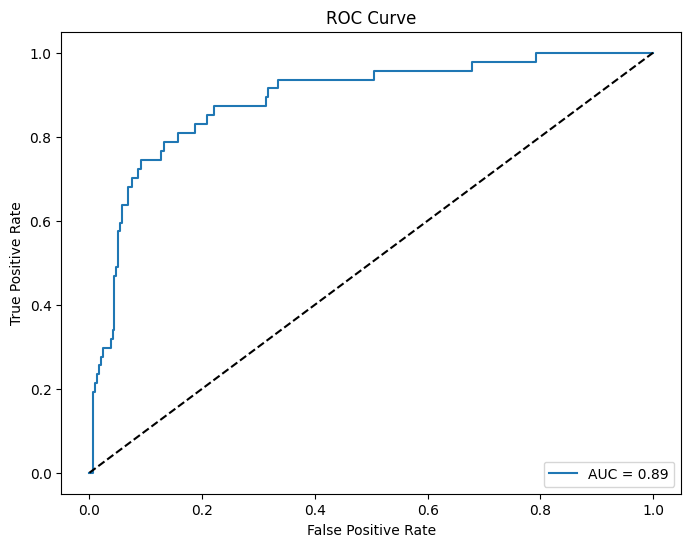

In [150]:
# importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Building the LogReg model
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Generating prediction
ypred_lr= lr.predict(x_test)
print(ypred_lr)

# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(lr, 'Logistic Regression', x_test, y_test, ypred_lr)

# Plotting ROC_AUC Curve
plot_roc_auc(lr, y_test)

# 2.  KNeighborsClassifier

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0]
--- KNN Classifier Evaluation ---
Confusion Matrix:
[[284   9]
 [ 30  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       293
           1       0.65      0.36      0.47        47

    accuracy                           0.89    

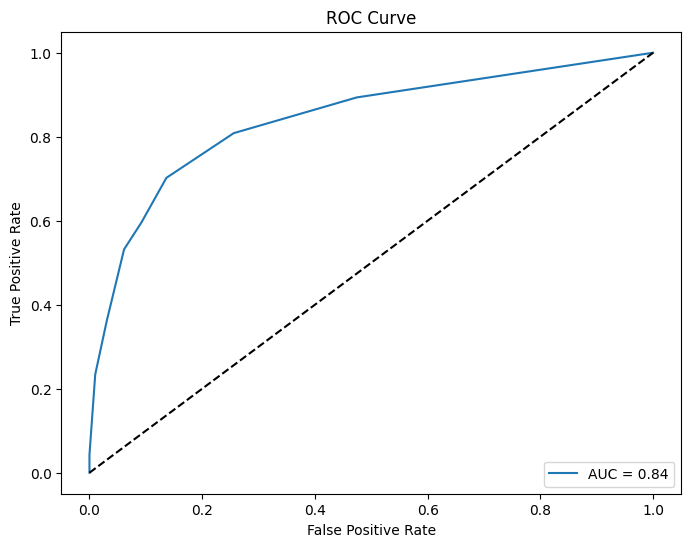

In [151]:
# importing KNN library
from sklearn.neighbors import KNeighborsClassifier

# Building the KNN Classifier Model
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

# Generating prediction
ypred_knn= knn.predict(x_test)
print(ypred_knn)

# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(knn, 'KNN Classifier', x_test, y_test, ypred_knn)

# Plotting ROC_AUC Curve
plot_roc_auc(knn, y_test)

# 3. Decision Tree Classifier

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0]
--- Decision Tree Classifier Evaluation ---
Confusion Matrix:
[[285   8]
 [ 28  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       293
           1       0.70      0.40      0.51        47

    accuracy                         

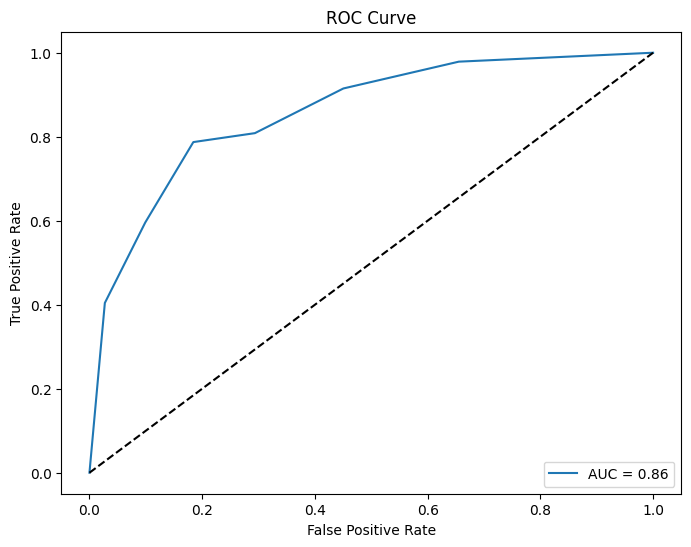

In [152]:
# importing Decision Tree library
from sklearn.tree import DecisionTreeClassifier

# Building the Decition Tree model
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=3,random_state=7)
dt.fit(x_train,y_train)

# Generating the predictions
ypred_dt = dt.predict(x_test)
print(ypred_dt)

# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(dt,'Decision Tree Classifier',x_test,y_test,ypred_dt)

# Plotting ROC_AUC Curve
plot_roc_auc(dt, y_test)

# 4. RandomForest Classifier

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]
--- Random Forest Evaluation ---
Confusion Matrix:
[[288   5]
 [ 33  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       293
           1       0.74      0.30      0.42        47

    accuracy                           0.89     

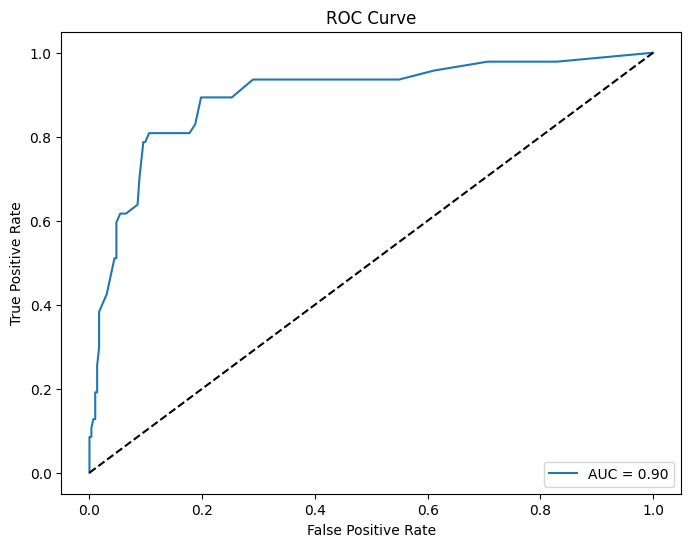

In [153]:
# Import Random Forest library
from sklearn.ensemble import RandomForestClassifier

# Building the RF Model
rf = RandomForestClassifier(n_estimators=80, random_state=7)
rf.fit(x_train,y_train)

# Generating the predictions
ypred_rf = rf.predict(x_test)
print(ypred_rf)

# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(rf,'Random Forest',x_test,y_test,ypred_rf)

# Plotting ROC_AUC Curve
plot_roc_auc(rf,y_test)

# 5. ExtraTrees Classifier

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]
--- Extra Trees Classifier Evaluation ---
Confusion Matrix:
[[289   4]
 [ 36  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       293
           1       0.73      0.23      0.35        47

    accuracy                           

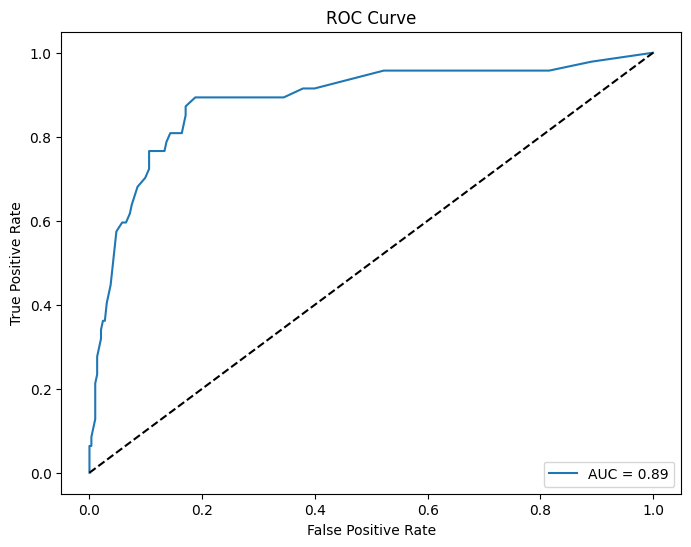

In [154]:
# Import Extra Trees library
from sklearn.ensemble import ExtraTreesClassifier

# Building the RF Model
et = ExtraTreesClassifier(random_state=7)
et.fit(x_train,y_train)

# Generating the predictions
ypred_et = et.predict(x_test)
print(ypred_et)

# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(et,'Extra Trees Classifier',x_test,y_test,ypred_et)

# Plotting ROC_AUC Curve
plot_roc_auc(et,y_test)

# 6.  XGBoost Classifier

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]
--- XGBoost Classifier Evaluation ---
Confusion Matrix:
[[279  14]
 [ 29  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       293
           1       0.56      0.38      0.46        47

    accuracy                           0.87

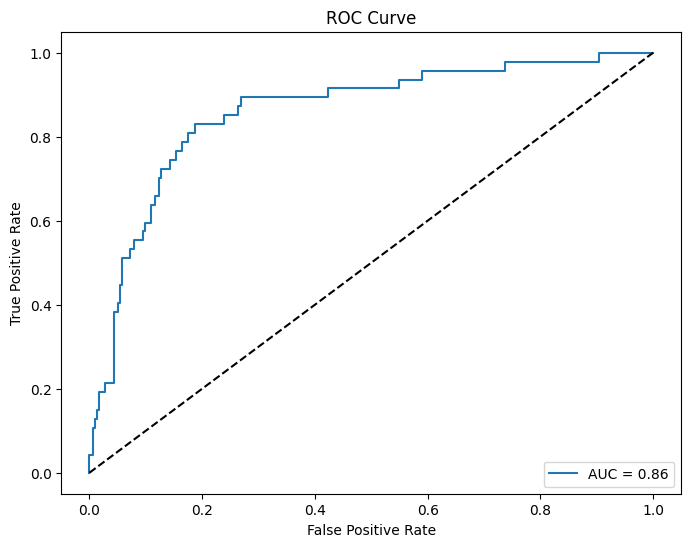

In [155]:
# Import XGBoost library
from xgboost import XGBClassifier

# Building the XGBoost Model
xgb = XGBClassifier(random_state=7)
xgb.fit(x_train,y_train)

# Generating the predictions
ypred_xgb = xgb.predict(x_test)
print(ypred_xgb)

# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(xgb,'XGBoost Classifier',x_test,y_test,ypred_xgb)

# Plotting ROC_AUC Curve
plot_roc_auc(xgb,y_test)

# Converting the result(Accuracy Score and AUC Score) into a dataframe.

In [156]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN Classifier','Decision Tree Classifier' ,'Random Forest Classifier','Extra Trees Classifier','Xgboost Classifier'],
    'Accuracy Score': [0.879, 0.885, 0.894, 0.888, 0.882, 0.873],
    'AUC Score': [0.887, 0.841,0.857, 0.896, 0.885, 0.858]})

result_df = results.sort_values(by='AUC Score', ascending=False)
result_df

Model  Accuracy Score  AUC Score
3  Random Forest Classifier           0.888      0.896
0       Logistic Regression           0.879      0.887
4    Extra Trees Classifier           0.882      0.885
5        Xgboost Classifier           0.873      0.858
2  Decision Tree Classifier           0.894      0.857
1            KNN Classifier           0.885      0.841

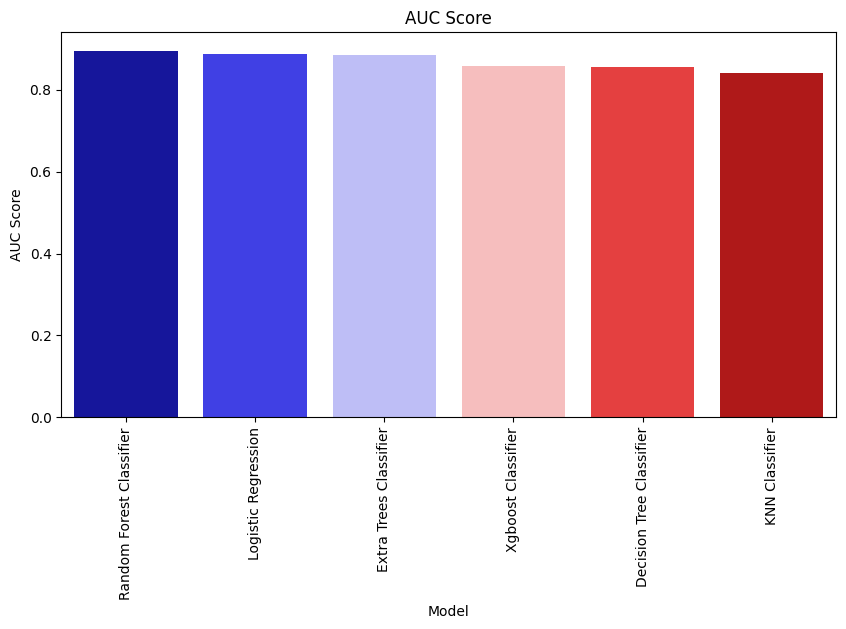

In [157]:
# Plotting the result
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='AUC Score',data=result_df,palette='seismic')
plt.xticks(rotation=90)
plt.title('AUC Score')
plt.show()

# From the above plots, we can see that Random Forest Classifier has the highest AUC Score and thus, it is the best model.